In [55]:
#import libs
import pandas as pd
import matplotlib.pyplot as plt
from  textblob import TextBlob 
from wordcloud import WordCloud,STOPWORDS  #WordCloud , #StopWords
import nltk
import string
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [13]:
data = pd.read_csv(r'youtube_comments')
data

,comments
0,Trumps win is probably the biggest underdog st...
1,Who’s here after Joe Biden president elect spe...
2,Who’s here after biden’s win
3,Anybody here after watching Biden speak at his...
4,i like how his youngest son is just awkwardly ...
...,...
115,what an epic night!!! i will never forget it!!...
116,"You know how trumps saying, “ stop counting vo..."
117,"Well, thankfully it was not eight years of thi..."
118,He thanks Mike Pence in the last 5 seconds of ...


In [14]:
#Processes data and create lable
pos=0
neg=0
neu=0
sent=[]
# printing line by line
for i in range(len(data)):
    
   #print(tweet.text)
    analysis=TextBlob(data['comments'][i]) # here it will apply NLP\
    print(analysis.sentiment)
   # now checking polarity only
    if analysis.sentiment.polarity > 0:
        print("posative")
        z=1
        sent.append(z)
        pos=pos+1
    elif analysis.sentiment.polarity == 0 :
        print("Neutral")
        z=0
        sent.append(z)
        neu=neu+1
    else :
        print("Negative")
        z=2
        sent.append(z)
        neg=neg+1
      
 


Sentiment(polarity=0.4666666666666666, subjectivity=0.4666666666666666)
posative
Sentiment(polarity=0.8, subjectivity=0.9)
posative
Sentiment(polarity=0.8, subjectivity=0.4)
posative
Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
Sentiment(polarity=-0.6, subjectivity=1.0)
Negative
Sentiment(polarity=0.4, subjectivity=0.35)
posative
Sentiment(polarity=0.30000000000000004, subjectivity=0.7)
posative
Sentiment(polarity=0.13333333333333333, subjectivity=0.6666666666666666)
posative
Sentiment(polarity=0.2625, subjectivity=0.55)
posative
Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
Sentiment(polarity=0.375, subjectivity=0.4666666666666667)
posative
Sentiment(polarity=-0.3229166666666667, subjectivity=0.8333333333333334)
Negative
Sentiment(polarity=-0.5, subjectivity=1.0)
Negative
Sentiment(polarity=0.16666666666666666, subjectivity=0.5)
posative
Sentiment(polarity=-0.20000000000000004, subjectivity=0.3)
Negative
Sentiment(polarity=0.45, subjectivity=0.2777777777777778)
posative
Senti

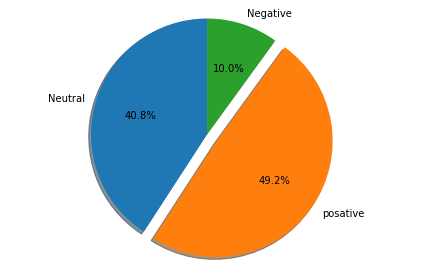

In [15]:
# Pie chart
labels = ['Neutral','posative', 'Negative']
sizes = [neu,pos, neg]# only "explode" the 2nd slice (i.e. 'posative')
explode = (0, 0.1, 0)#add colors
#colors = ['#ff9999','#66b3ff','#99ff99']
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')
plt.tight_layout()
plt.show()

In [17]:
#add sentiment colmun to data
data2 = data.assign(sentiment=sent)
data2

,comments,sentiment
0,Trumps win is probably the biggest underdog st...,1
1,Who’s here after Joe Biden president elect spe...,1
2,Who’s here after biden’s win,1
3,Anybody here after watching Biden speak at his...,0
4,i like how his youngest son is just awkwardly ...,2
...,...,...
115,what an epic night!!! i will never forget it!!...,1
116,"You know how trumps saying, “ stop counting vo...",1
117,"Well, thankfully it was not eight years of thi...",0
118,He thanks Mike Pence in the last 5 seconds of ...,1


In [ ]:
#trining model _ text classifction use naive bayes-multinomial naive bayes because because (0 is Neutral,1 is posative', 2 is Negative)

In [35]:
data2['sentiment'].value_counts()

1    59
0    49
2    12
Name: sentiment, dtype: int64

In [20]:
#cleaning data 

In [21]:
print(set(stopwords.words('English')))


{'hasn', 'an', 'her', 'and', 'how', 'who', 'those', 'have', "you'll", 'are', 'until', 'now', 'm', 'ourselves', 'doesn', 'if', 't', "you're", 'ours', "you've", 'nor', 'they', 'the', 'haven', "needn't", 'yourselves', 'few', 'themselves', "it's", 'isn', "didn't", 'of', 'with', 'don', 'to', 'by', 'over', 'on', 'down', 'such', 'needn', 'each', 'which', 're', 'mustn', 'doing', "won't", 'very', 'she', 'hers', 'these', 'theirs', 'some', "couldn't", "haven't", 'for', 'o', 'shouldn', "should've", 'than', 'only', 'then', 'couldn', 'them', 'mightn', 's', 've', 'ma', 'why', 'our', 'yourself', 'at', 'itself', 'your', 'my', 'had', 'shan', 'will', 'what', 'as', 'he', 'here', 'or', 'didn', 'myself', 'wouldn', 'there', 'yours', 'me', 'both', 'through', 'own', 'is', 'into', 'same', 'this', 'am', 'his', 'before', 'i', 'after', 'has', "she's", 'under', 'aren', 'a', 'against', "weren't", 'below', 'can', "mightn't", 'we', 'from', "doesn't", 'be', 'because', 'all', 'weren', 'him', "shouldn't", 'out', 'having'

In [36]:
#function make remove punctuation and stopwords and split word
def text_cleaning(a):
    remove_punctuation=[char for char in a if char not in string.punctuation]
    remove_punctuation=''.join(remove_punctuation)
    return [word for word in remove_punctuation.split() if word.lower() not in stopwords.words('english')]

In [25]:
# data after removing punctuation and stopwords
data_cleaning=data2.iloc[:,0].apply(text_cleaning)
print(data_cleaning)

0      [Trumps, win, probably, biggest, underdog, sto...
1          [Who’s, Joe, Biden, president, elect, speech]
2                                  [Who’s, biden’s, win]
3      [Anybody, watching, Biden, speak, victory, party]
4             [like, youngest, son, awkwardly, standing]
                             ...                        
115    [epic, night, never, forget, Mr, President, Do...
116    [know, trumps, saying, “, stop, counting, vote...
117    [Well, thankfully, eight, years, imridinwithbi...
118    [thanks, Mike, Pence, last, 5, seconds, speech...
119                            [Whos, 2020, election😂😂😂]
Name: comments, Length: 120, dtype: object


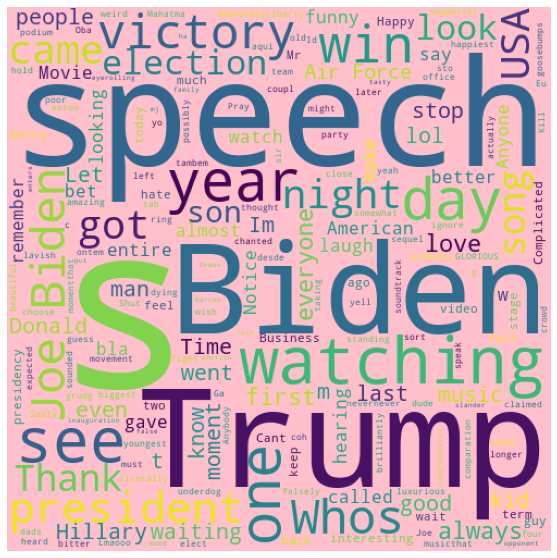

In [28]:
#show wordcloud text to comments Before that convert data to string
result=data_cleaning.to_string()
#print(type(result))
def plot_cloud(wordcloud):
    plt.figure(figsize=(10, 10))
    plt.imshow(wordcloud) 
    plt.axis("off");
wordcloud = WordCloud(width = 500, height = 500, background_color='pink', random_state=10).generate(result)
plot_cloud(wordcloud)

In [38]:
#Second, converting words into numbers
#using CountVectorizer from  sklearn.feature_extraction.text


In [39]:
bow_transformer=CountVectorizer(analyzer=text_cleaning).fit(data2['comments'])
bow_transformer.vocabulary_

{'Trumps': 142,
 'win': 639,
 'probably': 491,
 'biggest': 200,
 'underdog': 609,
 'story': 566,
 'history': 365,
 'media': 429,
 'ripped': 515,
 'Hollywood': 71,
 'Democrats': 43,
 'professors': 492,
 'even': 287,
 'party': 468,
 'Republicans': 123,
 'lot': 412,
 'time': 597,
 'still': 563,
 'Think': 138,
 'whatever': 636,
 'want': 624,
 'cant': 212,
 'deny': 259,
 'historic': 364,
 'Who’s': 157,
 'Joe': 82,
 'Biden': 31,
 'president': 490,
 'elect': 270,
 'speech': 554,
 'biden’s': 199,
 'Anybody': 25,
 'watching': 630,
 'speak': 553,
 'victory': 615,
 'like': 398,
 'youngest': 655,
 'son': 546,
 'awkwardly': 186,
 'standing': 560,
 'yeah': 649,
 'dads': 249,
 'bla': 202,
 'get': 329,
 'back': 187,
 'home': 367,
 'play': 474,
 'fortnite': 319,
 'lol': 404,
 'amazing': 173,
 'night': 454,
 'always': 172,
 'remember': 507,
 'day': 252,
 'hearing': 356,
 'Bidens': 33,
 'make': 420,
 'comparation': 231,
 'wow': 647,
 'breath': 204,
 'fresh': 322,
 'SANE': 124,
 'air': 170,
 'funny': 323,

In [40]:
#Third, transferring the entire data to numbers

In [41]:
title_bow=bow_transformer.transform(data2['comments'])
print(title_bow)

  (0, 43)	1
  (0, 71)	1
  (0, 123)	1
  (0, 138)	1
  (0, 142)	1
  (0, 200)	1
  (0, 212)	1
  (0, 259)	1
  (0, 287)	1
  (0, 364)	1
  (0, 365)	1
  (0, 412)	1
  (0, 429)	1
  (0, 468)	1
  (0, 491)	1
  (0, 492)	1
  (0, 515)	5
  (0, 563)	1
  (0, 566)	1
  (0, 597)	1
  (0, 609)	1
  (0, 624)	1
  (0, 636)	1
  (0, 639)	1
  (1, 31)	1
  :	:
  (116, 564)	1
  (116, 581)	1
  (116, 585)	1
  (116, 590)	1
  (116, 606)	1
  (116, 620)	1
  (116, 657)	1
  (116, 662)	1
  (117, 155)	1
  (117, 269)	1
  (117, 373)	1
  (117, 588)	1
  (117, 651)	1
  (118, 17)	1
  (118, 100)	1
  (118, 114)	1
  (118, 320)	1
  (118, 361)	1
  (118, 388)	1
  (118, 527)	1
  (118, 554)	1
  (118, 589)	1
  (119, 8)	1
  (119, 156)	1
  (119, 274)	1


In [42]:
# Fourth, we need knowledge in each comment the most important word

In [44]:
#TF-idf Algo - term frequency inverse document frequency to know the most significant words
tfidfTransformer=TfidfTransformer().fit(title_bow)
print(tfidfTransformer)

title_tfidf=tfidfTransformer.transform(title_bow)
print(title_tfidf)  #get tfidf  values for while vocabulary
print(title_tfidf.shape)

TfidfTransformer()
  (0, 639)	0.11226475960543487
  (0, 636)	0.14879605902633886
  (0, 624)	0.12207648643001831
  (0, 609)	0.14879605902633886
  (0, 597)	0.13697245979685435
  (0, 566)	0.14879605902633886
  (0, 563)	0.12858348263912073
  (0, 515)	0.7439802951316943
  (0, 492)	0.14879605902633886
  (0, 491)	0.14879605902633886
  (0, 468)	0.13697245979685435
  (0, 429)	0.12207648643001831
  (0, 412)	0.12858348263912073
  (0, 365)	0.14879605902633886
  (0, 364)	0.14879605902633886
  (0, 287)	0.11226475960543487
  (0, 259)	0.14879605902633886
  (0, 212)	0.12858348263912073
  (0, 200)	0.14879605902633886
  (0, 142)	0.12858348263912073
  (0, 138)	0.14879605902633886
  (0, 123)	0.14879605902633886
  (0, 71)	0.14879605902633886
  (0, 43)	0.14879605902633886
  (1, 554)	0.3011498503716373
  :	:
  (116, 134)	0.19954295217768528
  (116, 133)	0.19954295217768528
  (116, 107)	0.19954295217768528
  (116, 84)	0.19954295217768528
  (116, 63)	0.19954295217768528
  (116, 56)	0.19954295217768528
  (116, 5

In [45]:
#create model and prediction

In [51]:
model=MultinomialNB().fit(title_tfidf,data2['sentiment'])

In [52]:
all_predictions =model.predict(title_tfidf)
print(all_predictions)

[1 1 1 0 1 1 1 1 1 0 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 0 0 0 0 0 0 1 1 1 0 1 0
 1 0 1 1 0 0 0 0 1 0 1 1 0 1 1 1 1 0 0 0 0 1 1 0 1 0 1 1 1 1 0 1 0 1 0 0 1
 0 0 1 1 1 1 1 0 1 1 1 0 0 1 0 0 1 1 0 1 0 0 1 0 1 1 1 0 0 0 1 1 0 0 0 1 0
 0 1 1 1 1 1 0 1 0]


In [ ]:
# using Confusion Matrix to describe the performance of a classification model 

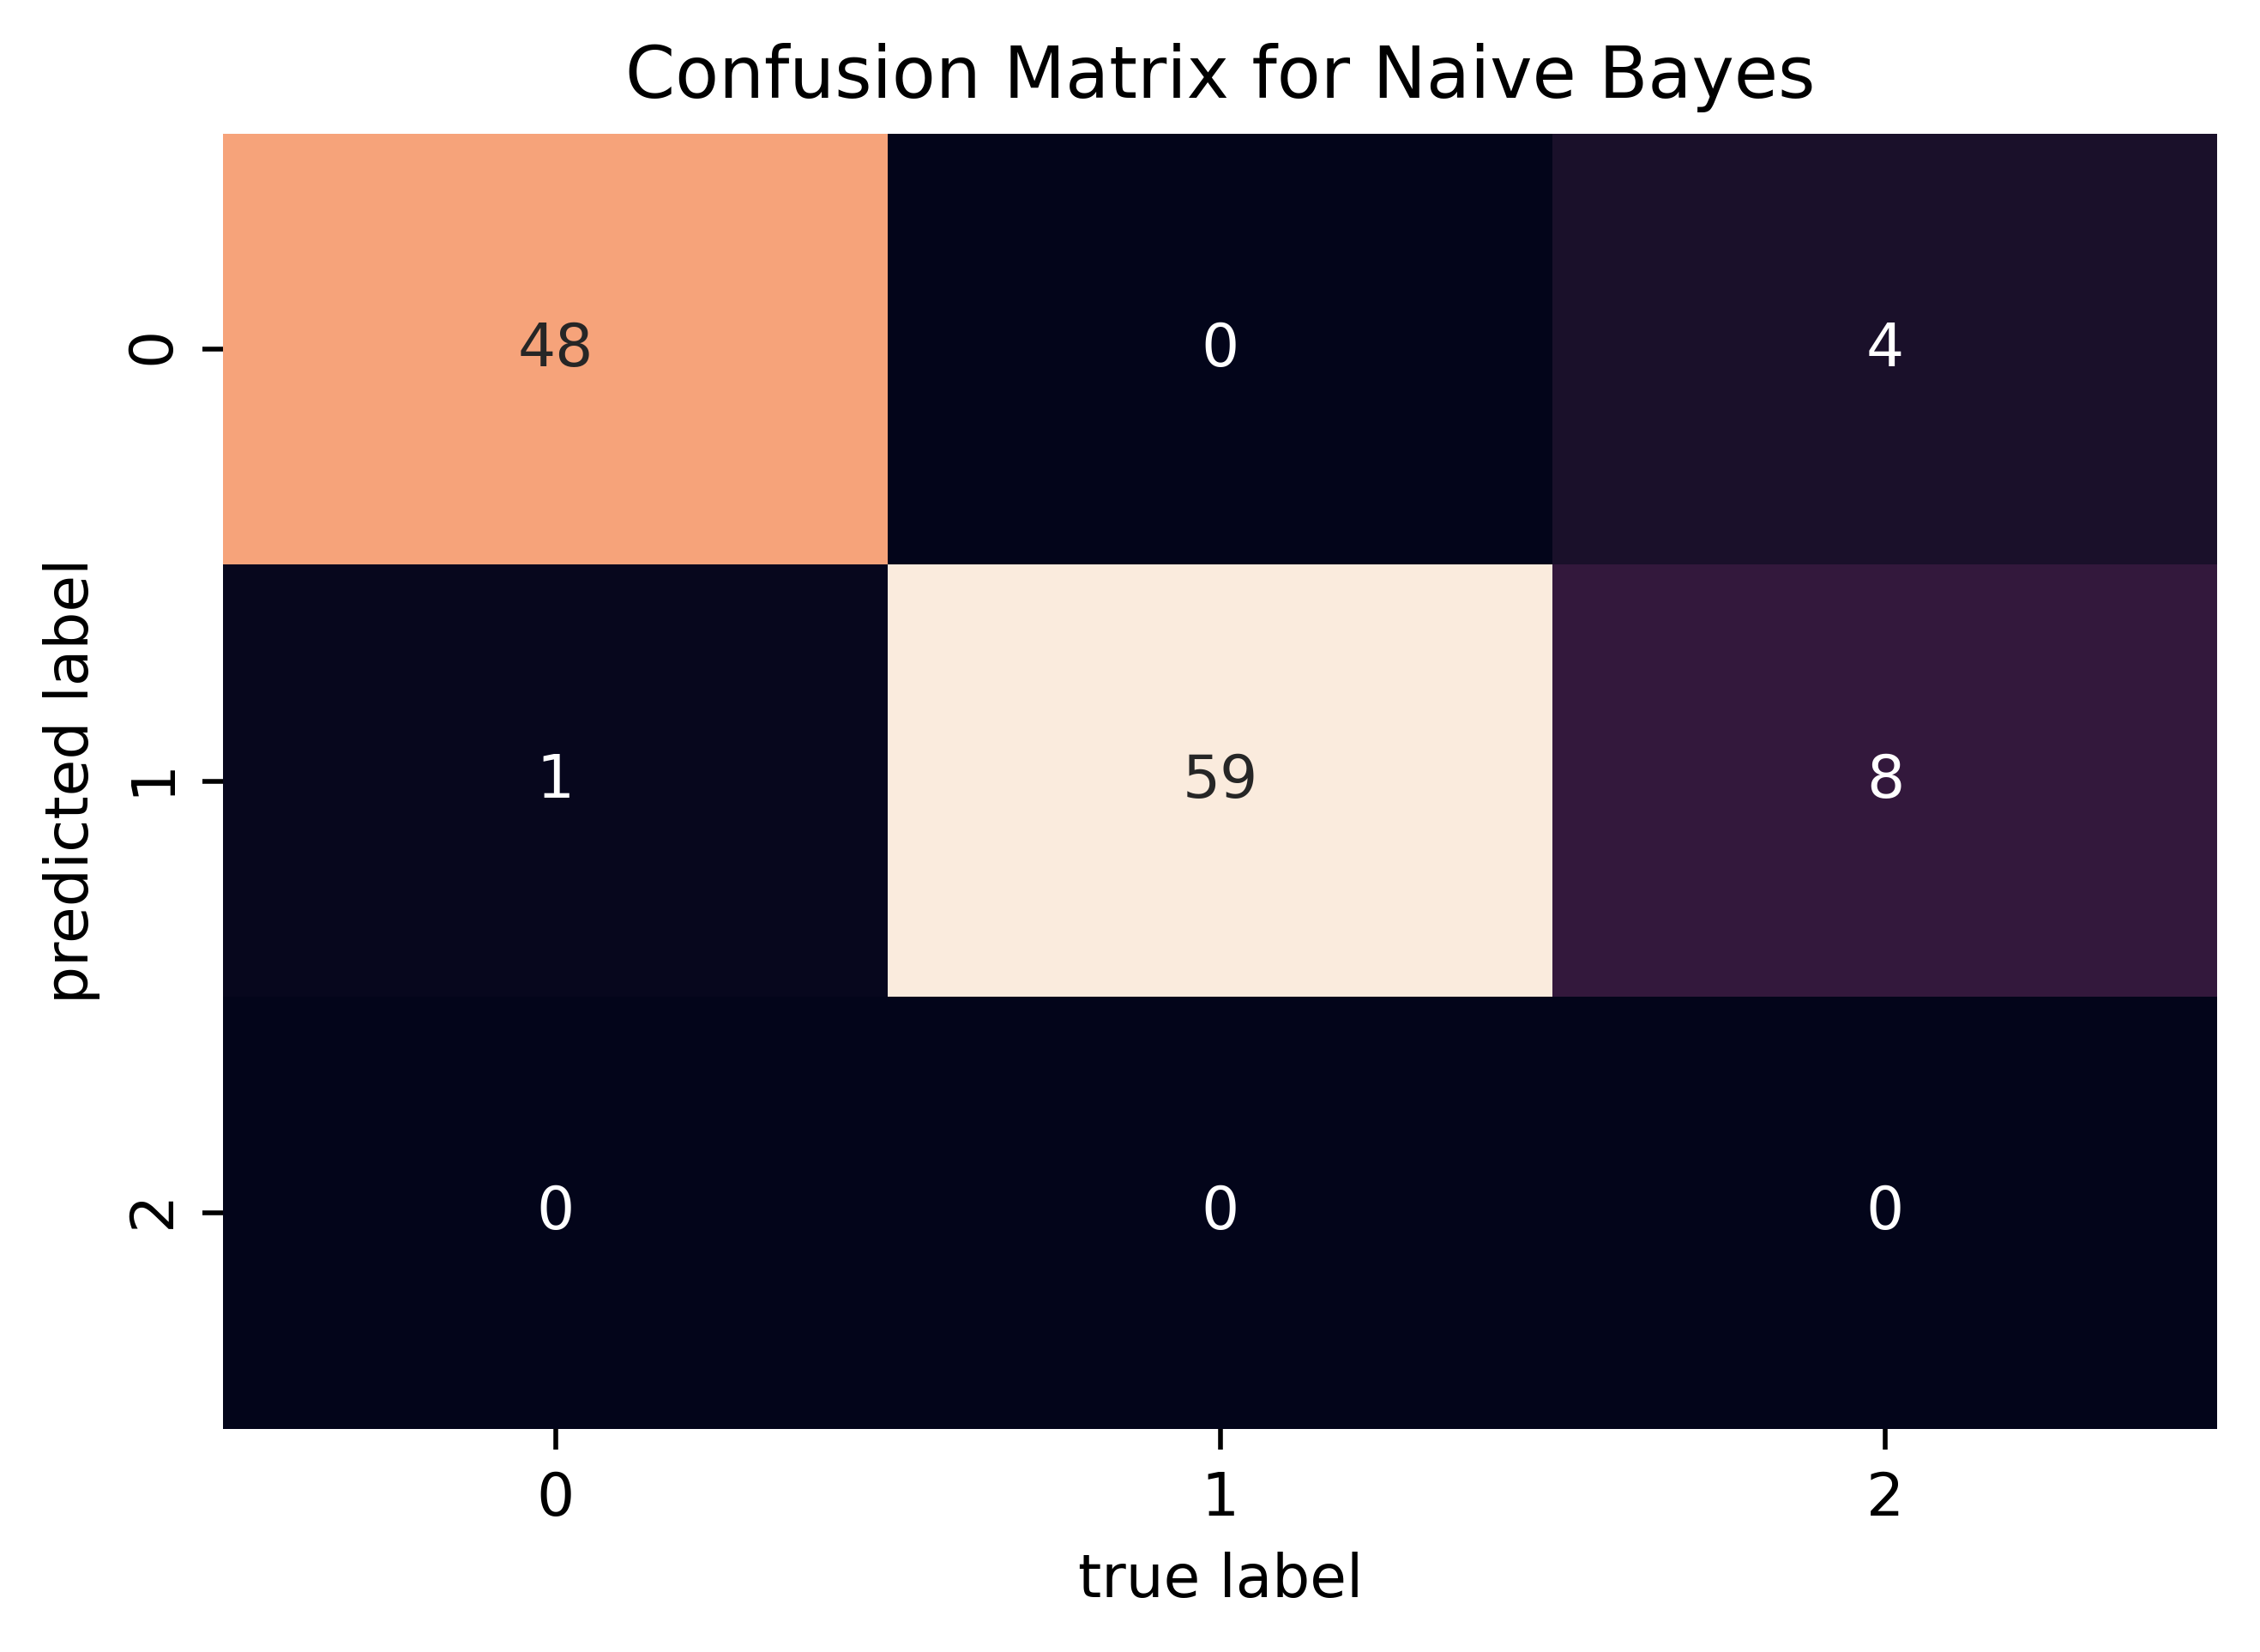

In [60]:

plt.figure(dpi=500)
mat = confusion_matrix(data2['sentiment'],all_predictions)
sns.heatmap(mat.T, annot=True, fmt='d', cbar=False)

plt.title('Confusion Matrix for Naive Bayes')
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.savefig("confusion_matrix.png")
plt.show()

In [ ]:
#Accuracy calculation

In [57]:
score_naive = accuracy_score(all_predictions, data2['sentiment'])
print("Accuracy with Naive-bayes: ",score_naive)

Accuracy with Naive-bayes:  0.8916666666666667


In [61]:
print(classification_report(all_predictions, data2['sentiment']))

              precision    recall  f1-score   support

           0       0.98      0.92      0.95        52
           1       1.00      0.87      0.93        68
           2       0.00      0.00      0.00         0

    accuracy                           0.89       120
   macro avg       0.66      0.60      0.63       120
weighted avg       0.99      0.89      0.94       120

